<a href="https://colab.research.google.com/github/pharringtonp19/mecon/blob/main/notebooks/optimization/Feasible_Neighborhood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture 
!pip install flexitext

In [2]:
import jax
import jax.numpy as jnp
from functools import partial
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import rcParams
from flexitext import flexitext
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
point = (1., 1.)
radius = .5 

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


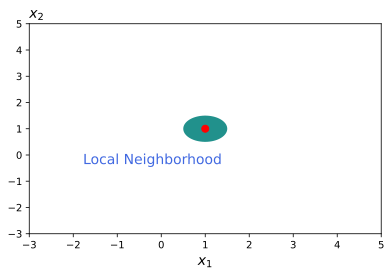

In [4]:
def relative_norm(x11, x12, x21, x22):
  return jnp.sqrt((x21-x11)**2 + (x22-x12)**2)

F = partial(relative_norm, point[0], point[1])

xp=jnp.linspace(-3.,5.,200)  # N
yp=jnp.linspace(-3.,5.,200)  # M

X, Y = jnp.meshgrid(xp, yp)

Z = F(X,Y)
fig = plt.figure(dpi=300, tight_layout=True)
plt.contourf(xp,yp,Z, [0, radius]) 
plt.scatter(point[0], point[1], s=50, color='red')
plt.title(r'$x_2$', loc='left', size=14)
plt.xlabel(r'$x_1$', size=14)
text = "<size:14, color:royalblue>Local Neighborhood</>"
flexitext(0.35, 0.35, text, ha="center");
fig.savefig('local_neighbor_unconstrained.png', format='png')
plt.show()

In [5]:
def c(x1, x2):
  return jnp.sin(x1) + jnp.sin(x2)

In [6]:
def constraint_fn(x1, x2):
  return c(x1, x2) - c(point[0], point[1])

print(constraint_fn(point[0], point[1]))

0.0


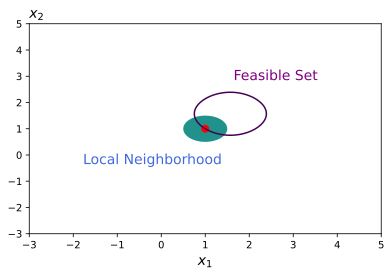

In [7]:
F = constraint_fn #partial(feasible_relative_norm, constraint_fn, point[0], point[1])
xp=jnp.linspace(-3.,5.,200)  # N
yp=jnp.linspace(-3.,5.,200)  # M

X, Y = jnp.meshgrid(xp, yp)

Z2 = F(X,Y)
fig = plt.figure(dpi=300, tight_layout=True)
plt.contourf(xp,yp,Z, [0, radius]) 
plt.contour(xp,yp,Z2,levels=[0]) 

plt.scatter(point[0], point[1], s=50, color='red')
plt.title(r'$x_2$', loc='left', size=14)
plt.xlabel(r'$x_1$', size=14)
text = "<size:14, color:royalblue>Local Neighborhood</>"
flexitext(0.35, 0.35, text, ha="center")

text = "<size:14, color:purple>Feasible Set</>"
flexitext(0.7, 0.75, text, ha="center")
fig.savefig('local_neighbor_constrained.png', format='png')
plt.show()